#Explicación Reto 3

Una empresa busca segmentar su base de clientes utilizando un enfoque simplificado, centrándose en variables clave que capturan las características demográficas, de comportamiento de compra, y de interacción digital de los clientes. Este enfoque permitirá identificar segmentos que reflejen diferentes necesidades y comportamientos de los clientes, lo que facilitará la personalización de productos y estrategias de marketing. fuente de datos.

La empresa está interesada en características como la edad, número de hijos, total de gasto de productos, total de promociones, Ingresos, número de visitas en páginas web y nivel educativo.
Para esta problemática se debe realizar los siguientes pasos:
1.	 Entendimiento de los datos: ¿los datos tienen registros faltantes? Elimínelos si los tiene.
2.	Seleccionar y crear las variables de interés para la empresa.
3.	Realice un análisis descriptivo de las variables, incluya gráficos y mencione una descripción general sobre los datos.
4.	Realice una transformación de variables categóricas a dummy y estandarizar las variables (con las variables de interés de la empresa) para aplicar los métodos de segmentación.
5.	Aplique K-means y Clúster jerárquico, determine el número de clústeres con los métodos propuestos en el curso (método del codo, puntaje de silueta y dendograma para el caso de clúster jerárquico). Justifique cual es el número de clústeres para k-means y Clúster jerárquico.
6.	Para K-means y Clúster jerárquico, con el número de clústeres definido en cada uno. Realice gráficos, resúmenes estadísticos para cada clúster. De una descripción de cada clúster tanto para los clústeres en K-means como en Clúster jerárquico. Para crear la descripción debe incluir gráficos que involucren todas las variables de interés para la empresa.
7.	De una conclusión general sobre cuál algoritmo (k-means o Clúster jerárquico) es mejor para este tipo de problemática y mencione algún tipo de propuesta para un solo clúster del algoritmo seleccionado.


In [ ]:
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # Manejo de Data Frame
# Librerias para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np # Arreglos matriciales

In [ ]:
datos= pd.read_csv("/content/drive/MyDrive/Aprendizaje no supervisador para el analisis de datos /marketing_campaign.csv",delimiter='\t') # copiar y pegar la ruta
datos.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


##1.	 Entendimiento de los datos: ¿los datos tienen registros faltantes? Elimínelos si los tiene.

Sí, en Ingresos hay 24 datos faltantes.

In [ ]:
datos.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##2.	Seleccionar y crear las variables de interés para la empresa.

Solo tendremos en cuenta las variables en los que la empresa está interada. Estas variables son: "Edades", "Número de hijos" "Total de gasto de productos", "Total de Promociones",
 "Ingresos", "Número de Visitas en Páginas Web" y "Nivel Educativo".

**Atributos**

Year_Birth: Año de nacimiento del cliente

Education: Nivel de educación del cliente

Income: Ingresos familiares anuales del cliente

Kidhome: Número de niños.

Teenhouse: Número de adolecentes.


MntWines: Importe gastado en vino en los últimos 2 años.

MntFrutas: Importe gastado en frutas en los últimos 2 años.

MntProductosCarne: Cantidad gastada en carne en los últimos 2 años.

MntProductosPescado: Cantidad gastada en pescado en los últimos 2 años.

MntProductosDulces: Cantidad gastada en dulces en los últimos 2 años.

MntGoldProds: Importe gastado en oro en los últimos 2 años.


NumDealsPurchases: Número de compras realizadas con descuento.

AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario.

AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario.

AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3ª campaña, 0 en caso contrario.

AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario.

AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario.

NumWebVisitsMonth: Número de visitas a la página web de la empresa en el último mes




In [ ]:
#Se sumaron kidhome y Teenhome para crear una variable llamada numero de hijos
datos["Hijos"]= datos["Kidhome"]+datos["Teenhome"]
datos["Hijos"].value_counts()

,count
Hijos,
1,1128
0,638
2,421
3,53


In [ ]:
#Se restaron el año actual con el año de nacimiento para obtener las Edades
datos["Edades"]=2024-datos["Year_Birth"]
datos["Edades"].value_counts()

,count
Edades,
48,89
53,87
49,83
52,79
46,77
54,77
51,74
59,74
55,71


De la variable Hijos se identificaron 3 datos atípicos que serán tomados en cuenta al momento de realizar el clustering

In [ ]:
datos["NumDealsPurchases"].value_counts()

,count
NumDealsPurchases,
1,970
2,497
3,297
4,189
5,94
6,61
0,46
7,40
8,14


Mnt es la cantidad de dinero que se gasto en el producto en los últimos dos años.

In [ ]:
#Se sumo la cantidad de dinero que se gasto por producto en los últimos dos años para así obtener el Total del Gasto
datos["TotalGasto"]=datos["MntWines"]+datos["MntFruits"]+datos["MntMeatProducts"]+datos["MntFishProducts"]+datos["MntSweetProducts"]+datos["MntGoldProds"]
datos["TotalGasto"].value_counts()

,count
TotalGasto,
46,19
22,18
57,16
44,15
55,15
...,...
1345,1
764,1
368,1


In [ ]:
datos["TotalPromociones"]=datos["AcceptedCmp1"]+datos["AcceptedCmp2"]+datos["AcceptedCmp3"]+datos["AcceptedCmp4"]+datos["AcceptedCmp5"]
datos["TotalPromociones"].value_counts()

,count
TotalPromociones,
0,1777
1,325
2,83
3,44
4,11


In [ ]:
datos["Income"].value_counts()

,count
Income,
7500.0,12
35860.0,4
37760.0,3
83844.0,3
63841.0,3
...,...
40760.0,1
41452.0,1
6835.0,1


In [ ]:
datos["NumWebVisitsMonth"].value_counts()

,count
NumWebVisitsMonth,
7,393
8,342
6,340
5,281
4,218
3,205
2,202
1,153
9,83


In [ ]:
#Eliminamos los datos faltantes
datos=datos.dropna()

In [ ]:
datos.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
data=datos[["Edades","Hijos","TotalGasto","NumDealsPurchases","NumWebVisitsMonth","Income","Education"]]
data.head()

,Edades,Hijos,TotalGasto,NumDealsPurchases,NumWebVisitsMonth,Income,Education
0,67,0,1617,3,7,58138.0,Graduation
1,70,2,27,2,5,46344.0,Graduation
2,59,0,776,1,4,71613.0,Graduation
3,40,1,53,2,6,26646.0,Graduation
4,43,1,422,5,5,58293.0,PhD


##3.	Realice un análisis descriptivo de las variables, incluya gráficos y mencione una descripción general sobre los datos.

In [ ]:
px.scatter(data,x="Income")

**Análisis:**
- El gráfico presenta una dispersión bastante uniforme en tod el rango de los ingresos.
- El valor máximo es extremadamente alto, por lo que es un dato atípico que se trabajará con sumo cuidado para que no afecte los resultados del modelo.
- La base de los clientes es diversa en términos de capacidad adquisitva. Para las estrategías se deberan segmentar los clientes en función de su nivel adquisitivo.

<Axes: xlabel='Education', ylabel='count'>

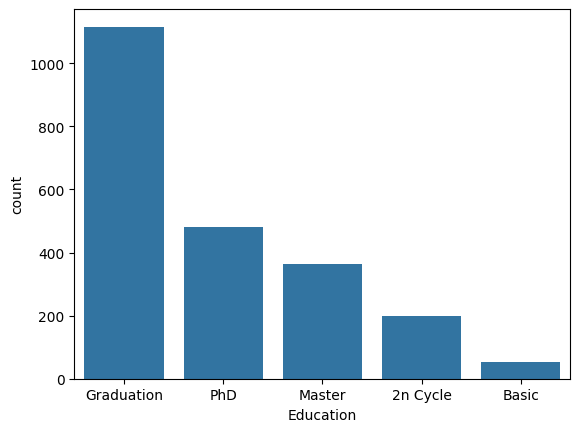

In [ ]:
sns.barplot(datos["Education"].value_counts())

**Análisis:**
- La mayoría de los clientes tienen un nivel educativo de graduacuón, por lo que se denota que los clientes tienen una alta educación.


<Axes: xlabel='Hijos', ylabel='count'>

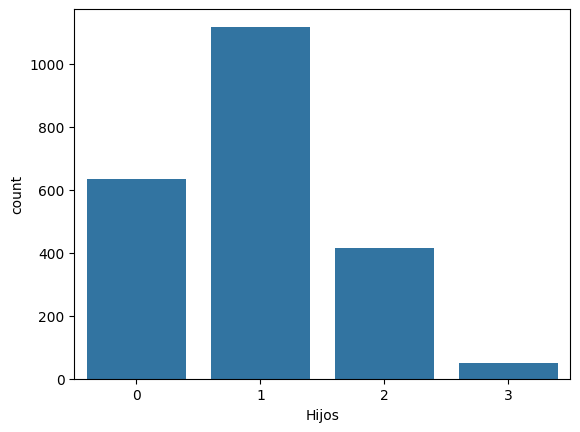

In [ ]:
sns.barplot(datos["Hijos"].value_counts())

**Análisis Variable Hijos:**

- La mayoría de los clientes tienen entre 0 y 1 hijos.
- La distribución es asimétrica hacía la izquierda y la mayoria de las personas tienen un hijo o no tienen hijos.
- Esto podría sugerir una base de clientes que podría estar más enfocada en indivuduos o familias pequeñas,

<Axes: xlabel='Edades', ylabel='Count'>

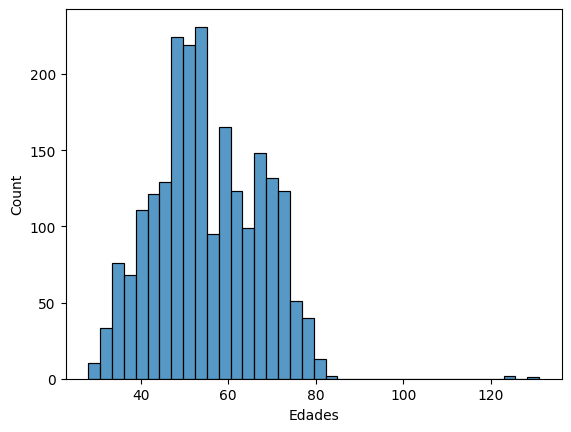

In [ ]:
sns.histplot(datos["Edades"])

**Análisis:**

- La distribución de las edades es aproximadamente simétrica, como se puede observar en el gráfico.

- Está variable presenta tres datos atipícos de 131, 125 y 124 años, podr+i a ser un error en los datos o casos excepcionales. Para este ejercicio no se excluiran esos datos.

- La mayoría de la población está en el rango entre 47 a 65 años, lo que significa que los clientes son de mediana edad.

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

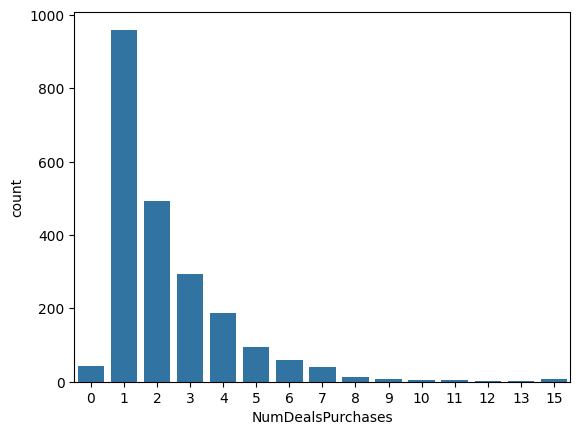

In [ ]:
sns.barplot(datos["NumDealsPurchases"].value_counts())

**Análisis NumDealsPurchases**

- La mayoría de los clientes han realizado entre 1 y 3 compras utilizando promociones, pero hay unos pocos clientes que tienen a comprar con muchas promociones.
- Esto indica que las promociones son populares entre los clientes, pero la variablidad en el uso de estas promociones sugiere que podrían ser optimizadas para captar a aquellos que no las usan con tanta frecuencia.

<Axes: xlabel='TotalGasto', ylabel='Count'>

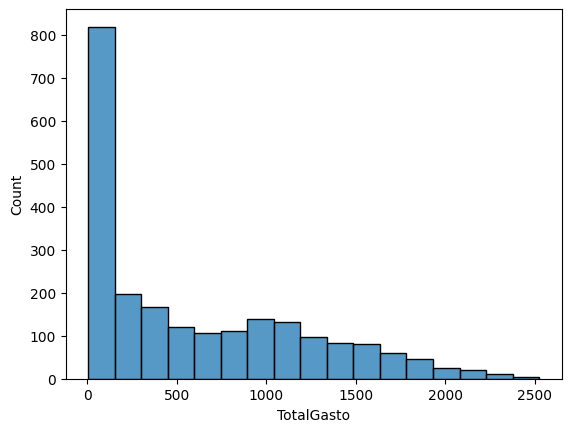

In [ ]:
sns.histplot(datos["TotalGasto"])

**Análisis de la Variable Total del Gasto**

- La distribución del gasto es de curva asimetríca positiva de cola larga esto significa que hay un alto número de clientes que gastab muy poco y pocos clientes que gastan mucho.
- Se podría explorar formas de aumentar el gasto de los clientes en el cuartil inferior.

<Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>

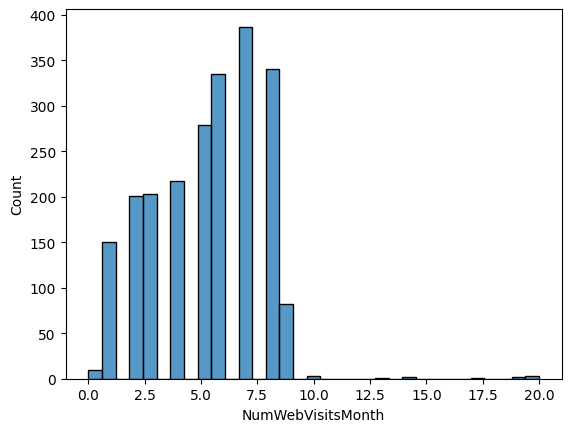

In [ ]:
sns.histplot(datos["NumWebVisitsMonth"])

** Análisis de la viariable:**
- La gráfica muestra una concentración de 6 visitas por mes, lo que indica una interacción moderada con el sitio web.
- Se debería analizar a los clientes que no interactuan en lo absoluto con la página y tomar la oportunidad para mejorar la participación en la web.

In [ ]:
data.describe()

,Edades,Hijos,TotalGasto,NumDealsPurchases,NumWebVisitsMonth,Income
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,55.179603,0.947202,607.075361,2.323556,5.319043,52247.251354
std,11.985554,0.749062,602.900476,1.923716,2.425359,25173.076661
min,28.000000,0.000000,5.000000,0.000000,0.000000,1730.000000
25%,47.000000,0.000000,69.000000,1.000000,3.000000,35303.000000
50%,54.000000,1.000000,396.500000,2.000000,6.000000,51381.500000
75%,65.000000,1.000000,1048.000000,3.000000,7.000000,68522.000000
max,131.000000,3.000000,2525.000000,15.000000,20.000000,666666.000000


**Análisis Descriptivo de las Variables**:

Este análisis describe una base de clientes diversa en términos de edad, ingresos y los comportamientos de compra.

Las variables `Edad`e `Ingreso`presentan datos atípicos. Las estrategias de mercado deben enfocarse en la segmentanción basada en ingresos, educación y el uso de promociones, aprovechando los clientes que interactúan más con la marca para maximizar su valor.



##4.	Realice una transformación de variables categóricas a dummy y estandarizar las variables (con las variables de interés de la empresa) para aplicar los métodos de segmentación

In [ ]:
#Librerias para Clústering
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
# Score de silueta
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler # estandarizar variables.

In [ ]:
datos_numericos = pd.get_dummies(data, # Variables categóticas a Dummy
                                 ['Education' ], # Columnas categorícas
                                 )

In [ ]:
datos_numericos.head()

,Edades,Hijos,TotalGasto,NumDealsPurchases,NumWebVisitsMonth,Income,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,67,0,1617,3,7,58138.0,False,False,True,False,False
1,70,2,27,2,5,46344.0,False,False,True,False,False
2,59,0,776,1,4,71613.0,False,False,True,False,False
3,40,1,53,2,6,26646.0,False,False,True,False,False
4,43,1,422,5,5,58293.0,False,False,False,False,True


In [ ]:
scaler = StandardScaler() # Función de estandarización
scaled_features = scaler.fit_transform(datos_numericos) #
pd.DataFrame(scaled_features, columns = datos_numericos.columns)

,Edades,Hijos,TotalGasto,NumDealsPurchases,NumWebVisitsMonth,Income,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.986443,-1.264803,1.675488,0.351713,0.693232,0.234063,-0.31497,-0.158041,0.992806,-0.444062,-0.526530
1,1.236801,1.405806,-0.962358,-0.168231,-0.131574,-0.234559,-0.31497,-0.158041,0.992806,-0.444062,-0.526530
2,0.318822,-1.264803,0.280250,-0.688176,-0.543978,0.769478,-0.31497,-0.158041,0.992806,-0.444062,-0.526530
3,-1.266777,0.070501,-0.919224,-0.168231,0.280829,-1.017239,-0.31497,-0.158041,0.992806,-0.444062,-0.526530
4,-1.016420,0.070501,-0.307044,1.391603,-0.131574,0.240221,-0.31497,-0.158041,-1.007246,-0.444062,1.899228
...,...,...,...,...,...,...,...,...,...,...,...
2211,0.151917,0.070501,1.217598,-0.168231,-0.131574,0.356642,-0.31497,-0.158041,0.992806,-0.444062,-0.526530
2212,1.904422,2.741110,-0.270546,2.431492,0.693232,0.467539,-0.31497,-0.158041,-1.007246,-0.444062,1.899228
2213,-1.016420,-1.264803,1.051696,-0.688176,0.280829,0.188091,-0.31497,-0.158041,0.992806,-0.444062,-0.526530
2214,1.069896,0.070501,0.391404,-0.168231,-0.956381,0.675388,-0.31497,-0.158041,-1.007246,2.251940,-0.526530


## 5. Aplique K-means y Clúster jerárquico, determine el número de clústeres con los métodos propuestos en el curso (método del codo, puntaje de silueta y dendograma para el caso de clúster jerárquico). Justifique cual es el número de clústeres para k-means y Clúster jerárquico.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

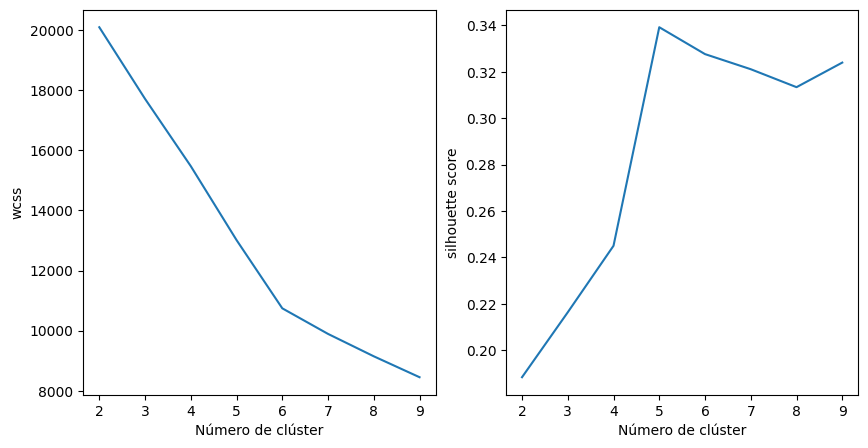

In [ ]:
silueta_score=[]
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k)
  k_means.fit(scaled_features)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(scaled_features, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

In [ ]:
k_means=KMeans(6, random_state=123  )
k_means.fit(scaled_features )
data["labels_k_means"]= k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-36-3c8c46a67a8b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



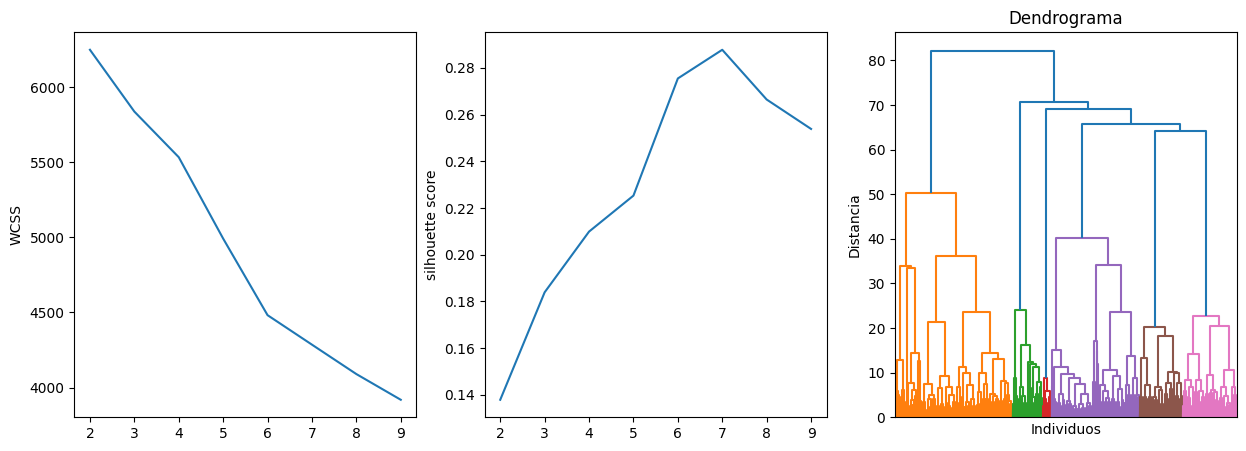

In [ ]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(scaled_features)
  scaled_temp= pd.DataFrame(scaled_features)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(scaled_features,centros  )  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(scaled_features,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")

# visualización clustering jerarquico
dist_matrix = linkage(scaled_features, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()

In [ ]:
hc=AgglomerativeClustering(6 )
hc.fit(scaled_features )
data["labels_hc"]= hc.labels_

<ipython-input-35-e3fc8cdfe415>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Determinación de número de clústere y justifiación:

**Método K-Means:**
- El el gráfico 1 del Método del Codo observamos a partir de 6, una disminución pronunciada, lo que significa que un clúster más no es beneficioso.
- En el puntaje de silueta los picos más altos están entre 6 y 7 clústeres y apartir de ahí, comienza a disminuir.
Por lo que por el método K-Means el número de clúster a elegir es de 6 ya que hay una concordacia en ambas gráficas.

**Clúster Jerárquico:**

- Observando el dendrograma, se puede identificar un punto de corte claro alrededor de 6 clústeres. A partir de este punto, las distancias entre los clústeres aumentan significativamente.

**Conclusión Final:**
Por ambos métodos el número de clúrteres es de 6, ya que un número más podría perjudicar el modelo y un número menos no quedan bien repartidos los datos.


##6.	Para K-means y Clúster jerárquico, con el número de clústeres definido en cada uno. Realice gráficos, resúmenes estadísticos para cada clúster. De una descripción de cada clúster tanto para los clústeres en K-means como en Clúster jerárquico. Para crear la descripción debe incluir gráficos que involucren todas las variables de interés para la empresa.

En el algoritmo k-means y Clúster Jerárquico identificamos 6 clúster. A continuación, vamos a caracterizar los clúster

In [ ]:
data['labels_k_means']=data['labels_k_means'].astype(str)
data[ 'labels_hc']=data[ 'labels_hc'].astype(str)

<ipython-input-37-e1dbeb64faee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-e1dbeb64faee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###K-Means

,proportion
labels_k_means,
3,34.837545
0,21.976534
2,17.554152
1,14.169675
4,9.025271
5,2.436823


Text(0.5, 1.0, 'Clúster con K-means')

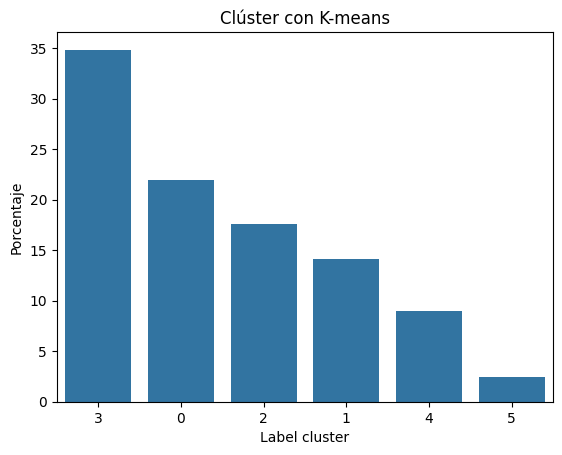

In [ ]:
display(data['labels_k_means'].value_counts(normalize=True)*100)
sns.barplot( data['labels_k_means'].value_counts(normalize=True)*100 )
plt.xlabel("Label cluster")
plt.ylabel("Porcentaje")
plt.title("Clúster con K-means")

Los números son etiquetas y ahora nos corresponde a nosotros etiquetarlas

In [ ]:
# incluir outlirs gráfico Boxplot
name_cluster= 'labels_k_means'
titulo = 'Clúster con k-means 6 clúster'
fig = px.box(data, color=name_cluster, y='Edades',
             title=titulo)
fig.update_xaxes(title_text="Label cluster")
fig.update_yaxes(title_text="Edades")

fig2 = px.box(data, color=name_cluster, y='TotalGasto',
              title=titulo)
fig2.update_xaxes(title_text="Label cluster")
fig2.update_yaxes(title_text="TotalGasto")

fig3= px.box(data, color=name_cluster, y='Income', title=titulo,
             )
fig3.update_xaxes(title_text="Label cluster")
fig3.update_yaxes(title_text="Income")

# Muestra los gráficos
fig.show()
fig2.show()
fig3.show()

In [ ]:
fig4= px.box(data, color=name_cluster, y='Hijos', title=titulo,
             )
fig4.update_xaxes(title_text="Label cluster")
fig4.update_yaxes(title_text="Hijos")


fig5= px.box(data, color=name_cluster, y='NumDealsPurchases', title=titulo) # Fixed typo
fig5.update_xaxes(title_text="Label cluster")
fig5.update_yaxes(title_text="NumDealsPurchases")

fig6=px.box(data, color=name_cluster, y='NumWebVisitsMonth', title=titulo,
             )
fig6.update_xaxes(title_text="Label cluster")
fig6.update_yaxes(title_text="NumWebVisitsMonth")

# Muestra los gráficos
fig4.show()
fig5.show()
fig6.show()

In [ ]:
tabla1 = datos.groupby('labels_k_means')["Education"].value_counts(normalize=True)
px.bar(tabla1.reset_index(), x='labels_k_means',y="proportion" , color="Education", barmode='group')

### Descripción de los Clúster K-Means:

**Clúster 0**:

Los individuos en este clúster tienen una edad media de 55 años, tienen un gasto relativamente alto en comparación con los demás clústeres con un máximo de 2525 dolares. Estos clientes tienen unos ingresos un poco altos en comparación con los otros clientes de una media de 76467
La mayoría de las personas no tienen hijos. Presentan un número bajo de compras promocionales, realizan en promedio dos visitas por mes en la página web y su nivel de educación es graduado y una porción notable de PdDs.

Lo que quiere decir que son individuos mayores con ingresos y gastos altos, pero poco interesados en compras y promociones

**Clúster 1:**

Este clúster tiene una distribución similar en edad a la del clúster 0, en promedio las personas tienen una edad de 56 años.
El total del gasto no es ni el más alto, ni el más bajo, con un promedio de 269.

El ingreso es el tercer más alto de unos, 465575 mil dorales.
Las personas tienen por lo menos un hijo y máximo tienen 3 hijos.
La mayoría de las personas realizan muy pocas compras promocionales y las visitas a la página web están en un rango medio de seis visitas por mes. Además, la mayoría de las personas tienen un nivel educativo de maestría.

En este clúster predominan las familias pequeñas con unos ingresos altos y gastos medios en compras.


**Clúster 2:**

En este clúster la edad de los individuos es un poco mayor al promedio de los demás clústeres, en promedio tienen una edad de 57 años.
En promedio tienen un gato más alto en comparación con el clúster 1, su gasto total es de 302.
En los ingresos son mucho más bajos que el clúster 0, pero más altos que el clúster 1.

Al igual que el clúster 1, en este clúster son familias pequeñas de por lo menos un hijo.
Este grupo realiza más compras, promociones en comparación con los clústeres anteriores.
También tienen un número más alto en el número de visitas a la web en comparación con los clústeres 0 y 1.
Y el nivel de Educación que predomina en este clúster es de phD.

Para este clúster son profesionales con ingresos medios y alta interacción en promociones y compras online.


**Clúster 3:**


Este clúster tiene en promedio una edad similar a la de los clústeres 0 y 2, su edad promedio es de 53 años.

El total del gasto en este clúster es el segundo más bajo, con un promedio de 142.5.  Y tiene una serie de gastos atípicos que pueden ser un error en la digitación. Por el lado del ingreso, estos individuos también tienen ingresos muy bajos, de un promedio de 40.797 dólares. Así como los clústeres 1 y 2 el clúster y tiene al menos un hijo.

Para el número de compras, estos individuos realizan compras más promocionales, aunque tienen una dispersión mayor.
Para el número de visitas al mes tienen un promedio bastante alto, de 7 visitas por mes. Y el nivel de educación de estos individuos es de graduación.

Son individuos de una mediana edad, con unos ingresos y gastos bajos, son familias pequeñas, y apenar de que no gastan mucho, tienen una alta visita en la página web.


**Clúster 4:**

Para este clúster la edad promedio es de 49 años y la edad máxima es de 77 años. También podemos visualizar que este clúster tiene dos datos atípicos.
Para el total del gasto en promedio tiene un gasto bajo, pero tiene una dispersión bastante alta de manera negativa desde 399 hasta los 2059 con un dato atípico.

Para los ingresos tiene una dispersión asimétrica, donde abarca un espacio muy amplio y en promedio gastan, 46805 dólares.
En promedio este tipo de individuos tiene 0 o un hijo, para el número de compras con promoción la media es de 2 compras y este clúster tiene 4 datos atípicos.

El número de visitas por mes tiene un promedio de 6 visitas por mes, pero tiene una dispersión positiva entre 1 y 4 y tienen un nivel de educación de 2n.



**Clúster 5:**

 Para el clúster 5 las edades oscilan entre 38 y 52 años y presenta un dato atípico de 77 años. De todos los clústeres este es que tiene menos gastos y presenta 3 datos atípicos. Además, en este clúster son los que menos ingresos presentan. Tiene por lo menos un hijo a una tendencia de no tener hijos, el número de ventas con descuento es el más bajo de todos los clústeres y tiene una media de 1, pero para las visitas a la página web también tiene una media de 7 y un máximo de 9 vistas por mes y su nivel educativo es básico.


### Clúster Jerárquico

,proportion
labels_hc,
0,34.431408
1,25.722022
4,15.749097
5,12.725632
2,8.935018
3,2.436823


Text(0.5, 1.0, 'Clúster Jerárquico')

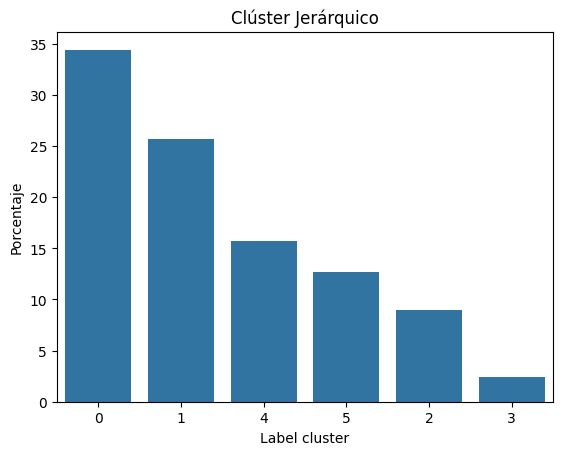

In [ ]:
display(data["labels_hc"].value_counts(normalize=True)*100)
sns.barplot( data["labels_hc"].value_counts(normalize=True)*100 )
plt.xlabel("Label cluster Jerárcico")
plt.ylabel("Porcentaje")
plt.title("Clúster Jerárquico")

Los números son etiquetas y ahora nos corresponde a nosotros etiquetarlas

In [ ]:
# incluir outlirs gráfico Boxplot
name_cluster= 'labels_hc'
titulo = 'Clúster Jerárquico 6 clúster'
fig = px.box(data, color=name_cluster, y='Edades',
             title=titulo)
fig.update_xaxes(title_text="Label cluster Jerárcico")
fig.update_yaxes(title_text="Edades")

fig2 = px.box(data, color=name_cluster, y='TotalGasto',
              title=titulo)
fig2.update_xaxes(title_text="Label cluster Jerárcico")
fig2.update_yaxes(title_text="TotalGasto")

fig3= px.box(data, color=name_cluster, y='Income', title=titulo,
             )
fig3.update_xaxes(title_text="Label cluster Jerárcico")
fig3.update_yaxes(title_text="Income")

fig4= px.box(data, color=name_cluster, y='Hijos', title=titulo,
             )
fig4.update_xaxes(title_text="Label cluster Jerárcico")
fig4.update_yaxes(title_text="Hijos")


fig5= px.box(data, color=name_cluster, y='NumDealsPurchases', title=titulo) # Fixed typo
fig5.update_xaxes(title_text="Label cluster Jerárcico")
fig5.update_yaxes(title_text="NumDealsPurchases")

fig6=px.box(data, color=name_cluster, y='NumWebVisitsMonth', title=titulo,
             )
fig6.update_xaxes(title_text="Label cluster Jerárcico")
fig6.update_yaxes(title_text="NumWebVisitsMonth")

# Muestra los gráficos
fig.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

In [ ]:
tabla1 = datos.groupby('labels_hc')["Education"].value_counts(normalize=True)
px.bar(tabla1.reset_index(), x='labels_hc',y="proportion" , color="Education", barmode='group')

###Descripción de los cluster Jerárquico:

**Clúster 0**

El clúster o es el más grante de todos. Los individuos en este clúster tienen una edad media de 58 años, lo que indica que son personas mayores.Este grupo tiene un gasto total más alto en compraración con los demás, con una media de 1135. Este clúster tiene los ingresos más altos y oresenta un dato atípico de 666k. la mayoria tienen no tienen hijos y realizan un número muy poco de compras con promociones, el número de visitas también es poco y tiene a hacer de 5 visitas por mes y para este clúster predomina la edicacion de graduación, aunque tambibién hay un porcetaje de maestria y phd.

**Clúster 1:**

Este clúster es el segundo más grande. Tiene una distribución de edad liegramente más joven que el clúster 0, la edad media está en 51 años.
El total del gasto es de los más pequeños con una media de 88.5.
Los ingresos también son de los más bajos en comparación con los demás clústeres.
La mayoría de las personas tienen entre 1 y 2 hijos.
Realizan pocas compras promocionales, alrededor de 1 o 2 compras por mes.
Las visitas por mes son de los más altas, los indivifuos de este clúster visitna la página web entre 6-8 visitas mensuales.
Para este clúster predomina la educación por graduación.


**Clúster 2:**

Este clúster es el segundo más perqueño. Los individuos son un poco más jovenes con una edad media de 49 años. El total del gasto tiende a ser en su mayoría entre 196 y 889.
Los ingresos son moderados, pero con gran variabilidad. La mayoria no tienen hijos o tienen apenas un hijo. Este grupo realiza más compras con promoción más proporcionaes que los otros clústres y van desde los 0 hasta los 3 compras.
El número de visitas a la página web es mucho más moderado que los demás clústeres y tienen un número de visitas entre 4 y 6 visitas por mes.
El nível educatico es de 2n Cycle.


**Clúster 3:**

Este es el clúster más pequeño de todos. Las personas de este clúster en promedio son las más jovenes con una media de 45 años. El total del gasto es el más pequeño de todos con una media de 57. Al igual que los ingresos son los más bajos de todos con una media al rededors de los 20000k.
La mayoría no tienen hijos o tienes apenas 1 hijo.
Las compras con promociones tienen 1 por mes, pero el número de vistas está entre los 6 y 8 por mes y para este clúster la educación que predomina es la básica.

**Clúster 4:**

El clúster 4 es el tercero más grande. Los individuos de este tienen una edad entre los 50 y 60 años lo que indica que son personas adultas.
El total del gasto es mucho mayor con el clúster 1 y 0 con el 75% del gasto 752.
En promedio las personas tienen un ingreso del 48918k.
Así como en el clúster 1, los individuos tienden a tener entre 1 y 2 hijos
En las compras promocionales realizan entre 1 y 2 por mes y tienen a visitar la página web entre 5 7 veces por mes. La eduacación en su mayoría es de phD.

**Clúster 5**

Representa al aproximadamente el 10% de los datos.
Estos individos tiene una edad parecida a los del clúster 4, en promedio tienen una edad de 56 años.
El total del gasto es mucho más bajo que el clúster 4 pero más alto que el clúster 1.
Los ingresos son bastantes parecidos a los del clúster 4, esté presenta una media de 44904k. La mayoría tambien tienen entre 1 y 2 hijos. Las compras por promociones tienen a ser entre 2 y 4 por mes, mientras que las visitas a la página web como el clúster anterior tienen a ser entre 5 y 7 por mes.
La eduación que predomina en este clúster es el master.

##7. De una conclusión general sobre cuál algoritmo (k-means o Clúster jerárquico) es mejor para este tipo de problemática y mencione algún tipo de propuesta para un solo clúster del algoritmo seleccionado.


**Conclusión General**:

- En este caso, **K-means** es el algoritmo más adecuado debido a su rapidez, eficiencia y facilidad para interpretar los clústeres. Proporciona una segmentación clara y coherente que facilita la toma de decisiones y el diseño de estrategias específicas, lo cual es crucial para este tipo de análisis donde se busca identificar grupos bien diferenciados de consumidores.


**Propuesta para el Clúster 0 (K-Means):**
-Implementar un programa de lealtad que ofrezca beneficios exclusivos como descuentos en productos de lujo, acceso a eventos privados o servicios adicionales premium. Este tipo de propuesta sería atractiva para individuos con altos ingresos y un comportamiento de gasto elevado.
- Aprovechar su alta frecuencia de visitas a la web mediante campañas de marketing digital altamente personalizadas. Utilizar retargeting para mostrar ofertas exclusivas y promociones en sus visitas a la web.
-  Su alto nivel educativo, es probable que este grupo valore contenido educativo de alta calidad. Incluir artículos, seminarios web, o boletines informativos sobre temas relevantes puede mejorar la fidelidad y el compromiso con la marca.
